Load required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive

Load Data

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x_test = np.load('/content/drive/MyDrive/datasets/x_test.npy',allow_pickle=True)
x_train = np.load('/content/drive/MyDrive/datasets/x_train.npy',allow_pickle=True)
x_val = np.load('/content/drive/MyDrive/datasets/x_val.npy',allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/datasets/y_test.npy',allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/datasets/y_train.npy',allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/datasets/y_val.npy',allow_pickle=True)

In [4]:
print(f"len of x_train = {len(x_train)}")
print(f"len of x_test = {len(x_test)}")
print(f"len of x_val = {len(x_val)}")

len of x_train = 6985
len of x_test = 874
len of x_val = 873


Reshape data

In [5]:
x_test.shape

(874, 128, 128)

In [6]:
x_test = x_test.reshape(x_test.shape + (1,))

In [7]:
x_test.shape

(874, 128, 128, 1)

In [8]:
x_train = x_train.reshape(x_train.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))

Convert Y values to Integer

In [9]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
y_val = y_val.astype(np.int32)

Model building

In [10]:
model=tf.keras.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                                 kernel_regularizer=tf.keras.regularizers.L2(0.007), 
                                 padding="same", activation="relu", 
                                 input_shape=(128,128,1)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                                 kernel_regularizer=tf.keras.regularizers.L2(0.007), 
                                 padding="same", activation="relu"))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                                 kernel_regularizer=tf.keras.regularizers.L2(0.007), 
                                 padding="same", activation="relu"))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                                 kernel_regularizer=tf.keras.regularizers.L2(0.007), 
                                 padding="same", activation="relu"))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     1

Training the model

In [13]:
results = model.fit(x=x_train, y=y_train, batch_size=128, epochs=70, validation_data=(x_val, y_val))

Epoch 1/70
55/55 [==============================] - 22s 261ms/step - loss: 3.5665 - accuracy: 0.2959 - val_loss: 3.0847 - val_accuracy: 0.1191
Epoch 2/70
55/55 [==============================] - 11s 204ms/step - loss: 2.2251 - accuracy: 0.4770 - val_loss: 3.0541 - val_accuracy: 0.1042
Epoch 3/70
55/55 [==============================] - 11s 207ms/step - loss: 2.0174 - accuracy: 0.5476 - val_loss: 2.9903 - val_accuracy: 0.1627
Epoch 4/70
55/55 [==============================] - 11s 206ms/step - loss: 1.8345 - accuracy: 0.6105 - val_loss: 2.9369 - val_accuracy: 0.1363
Epoch 5/70
55/55 [==============================] - 11s 203ms/step - loss: 1.7340 - accuracy: 0.6419 - val_loss: 2.8565 - val_accuracy: 0.1959
Epoch 6/70
55/55 [==============================] - 11s 202ms/step - loss: 1.6060 - accuracy: 0.6789 - val_loss: 2.8816 - val_accuracy: 0.1901
Epoch 7/70
55/55 [==============================] - 11s 200ms/step - loss: 1.5307 - accuracy: 0.6992 - val_loss: 2.7008 - val_accuracy: 0.2772

Train vs test history plots

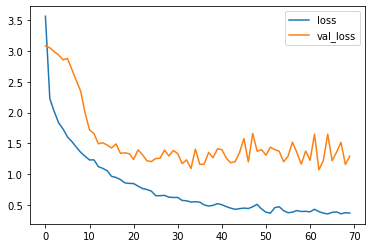

In [14]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label ="val_loss")

plt.legend()
plt.show()

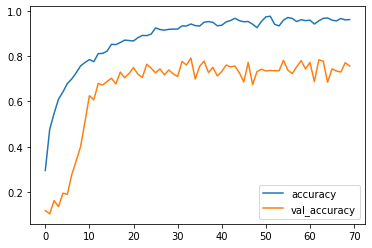

In [15]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label ="val_accuracy")

plt.legend()
plt.show()

Model Evaluation

In [16]:
acc = model.evaluate(x_test,y_test)[1]

28/28 [==============================] - 1s 18ms/step - loss: 1.1727 - accuracy: 0.7643


In [17]:
tags = {
0 : 'air_conditioner',
1 : 'car_horn',
2 : 'children_playing',
3 : 'dog_bark',
4 : 'drilling',
5 : 'engine_idling',
6 : 'gun_shot',
7 : 'jackhammer',
8 : 'siren',
9 : 'street_music'}

In [18]:
y_pred = []
for p in x_test:
  pred = model.predict(p.reshape(1,128,128,1))
  pred = pred.argmax()
  y_pred.append(pred)

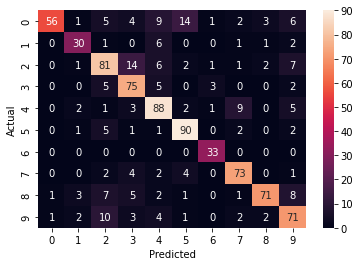

In [19]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [20]:
for key,value in tags.items():
  cm = confusion_matrix[key][key] / confusion_matrix[key].sum()
  print(f"accuracy for {value} = {cm}")

print(f"\naccuracy = {acc}")


accuracy for air_conditioner = 0.9655172413793104
accuracy for car_horn = 0.75
accuracy for children_playing = 0.6923076923076923
accuracy for dog_bark = 0.6880733944954128
accuracy for drilling = 0.7154471544715447
accuracy for engine_idling = 0.7894736842105263
accuracy for gun_shot = 0.8461538461538461
accuracy for jackhammer = 0.8021978021978022
accuracy for siren = 0.8987341772151899
accuracy for street_music = 0.6826923076923077

accuracy = 0.7643020749092102


Tests with test dataset

In [21]:
print(f"x_test[3] is {tags[y_test[3]]}")

predict_1 = model.predict(x_test[3].reshape(1,128,128,1))
tag_1 = predict_1.argmax()
probability_1 = predict_1.max()

print(f"x_test[3] is {probability_1} percent {tags[tag_1]}")

x_test[3] is dog_bark
x_test[3] is 0.9828981161117554 percent dog_bark


In [22]:
print(f"x_test[33] is {tags[y_test[33]]}")

predict_2 = model.predict(x_test[33].reshape(1,128,128,1))
tag_2 = predict_2.argmax()
probability_2 = predict_2.max()

print(f"x_test[33] is {probability_2} percent {tags[tag_2]}")

x_test[33] is jackhammer
x_test[33] is 0.6963932514190674 percent engine_idling


In [23]:
print(f"x_test[416] is {tags[y_test[416]]}")

predict_3 = model.predict(x_test[416].reshape(1,128,128,1))
tag_3 = predict_3.argmax()
probability_3 = predict_3.max()

print(f"x_test[416] is {probability_3} percent {tags[tag_3]}")

x_test[416] is air_conditioner
x_test[416] is 0.9867836236953735 percent air_conditioner
